In [47]:
import string
import unicodedata

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 7

import re
import unicodedata
from string import punctuation

import nltk
import spacy
from autocorrect import Speller, spell
from bs4 import BeautifulSoup
from contractions import contractions_dict
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from wordcloud import STOPWORDS, WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import threading
from sklearn.tree import DecisionTreeClassifier


In [8]:
# Preprocessing methods

snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

contractions_dict = {     
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I had",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "iit will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that had",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they had",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

def lemmatize( text):
    """
    take string input and lemmatize the words.
    use WordNetLemmatizer to lemmatize the words.
    """
    word_tokens = nltk.word_tokenize(text)
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in word_tokens]
    return (" ".join(lemmatized_word))

def remove_numbers(text):
    """
    take string input and return a clean text without numbers. 
    Use regex to discard the numbers.
    """
    output = ''.join(c for c in text if not c.isdigit())
    return output

def remove_punct(text):
    """
    take string input and clean string without punctuations.
    use regex to remove the punctuations.
    """
    return ''.join(c for c in text if c not in punctuation)

def remove_stopwords(sentence):
    """
    removes all the stop words like "is,the,a, etc."
    5 lines of code can be written in one line as:
        return ' '.join([w for w in word_tokenize(sentence) if not w in stop_words]) 
    """
    clean_sent =[]
    for w in word_tokenize(sentence):
        if not w in stop_words:
            clean_sent.append(w)
    return " ".join(clean_sent)

def remove_Tags(text):
    """
    take string input and clean string without tags.
    use regex to remove the html tags.
    """
    cleaned_text = re.sub('<[^<]+?>','', text)
    return cleaned_text

def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

def sentence_tokenize(text):
    """
    take string input and return list of sentences.
    use nltk.sent_tokenize() to split the sentences.
    """
    sent_list=[]
    for w in nltk.sent_tokenize(text):
        sent_list.append(w)
    return sent_list

def autospell(text):
    """
    correct the spelling of the word.
    """
    spells = [Speller().autocorrect_word(w) for w in (nltk.word_tokenize(text))]
    return " ".join(spells)

def stemming(text):
    """
    take string input and stem the words.
    use snowball_stemmer to stem the string.
    """
    word_tokens = nltk.word_tokenize(text)
    stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
    return " ".join(stemmed_word)

def to_lower(text):
    """
    Converting text to lower case as in, converting "Hello" to "hello" or "HELLO" to "hello".
    """
    return ' '.join([w.lower() for w in word_tokenize(text)])

def word_tokenize( text):
    """
    take string input and return list of words.
    use nltk.word_tokenize() to split the words.
    """
    word_list=[]
    for sentences in nltk.sent_tokenize(text):
        for words in nltk.word_tokenize(sentences):
            word_list.append(words)
    return word_list

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
    #remove_accented_chars('Sómě Áccěntěd těxt')

def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                    flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def pre_process1( text):
    """
    """
    text = remove_accented_chars(text)
    text = expand_contractions(text, contractions_dict)
    text = remove_punct(text)
    text = autospell(text)
    text = to_lower(text)
    text = remove_stopwords(text)
    text = remove_numbers(text)
    #text = lemmatize(text)
    text = stemming(text)
    text = word_tokenize(text)
    return ' '.join(text)


def pre_process2(text):
        lower_text = to_lower(text)
        sentence_tokens = sentence_tokenize(lower_text)
        word_list = []
        for each_sent in sentence_tokens:
            lemmatizzed_sent = lemmatize(each_sent)
            clean_text = remove_numbers(lemmatizzed_sent)
            clean_text = remove_punct(clean_text)
            clean_text = remove_Tags(clean_text)
            clean_text = remove_stopwords(clean_text)
            word_tokens = word_tokenize(clean_text)
            for i in word_tokens:
                word_list.append(i)
        return word_list

In [21]:
# multi threading method which does actual preprocessing
def preprocess_features(lst_txt, features):
    for text in lst_txt:
        features.append(pre_process1(text))
        #print(text)

In [3]:
amazon = pd.read_csv('amazonreviews.tsv', sep="\t")
amazon

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."
...,...,...
9995,pos,A revelation of life in small town America in ...
9996,pos,Great biography of a very interesting journali...
9997,neg,Interesting Subject; Poor Presentation: You'd ...
9998,neg,Don't buy: The box looked used and it is obvio...


In [4]:
# non-na all values
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10000 non-null  object
 1   review  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [5]:
# label is unbalanced...values are almost close we take accuracy
amazon.label.value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

In [6]:
amazon['word_count'] = amazon.review.apply(len)
amazon

,label,review,word_count
0,pos,Stuning even for the non-gamer: This sound tra...,426
1,pos,The best soundtrack ever to anything.: I'm rea...,509
2,pos,Amazing!: This soundtrack is my favorite music...,760
3,pos,Excellent Soundtrack: I truly like this soundt...,743
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",481
...,...,...,...
9995,pos,A revelation of life in small town America in ...,867
9996,pos,Great biography of a very interesting journali...,861
9997,neg,Interesting Subject; Poor Presentation: You'd ...,650
9998,neg,Don't buy: The box looked used and it is obvio...,135


In [7]:
amazon.word_count.describe()

count    10000.000000
mean       438.695400
std        239.241132
min        101.000000
25%        238.000000
50%        391.000000
75%        605.000000
max       1015.000000
Name: word_count, dtype: float64

In [9]:
features = amazon['review']
label = amazon['label']

In [14]:
# multi threading to reduce time for proprocessing....still taking 10 hrs
features_preproc_1 = []
features_preproc_2 = []
features_preproc_3 = []
features_preproc_4 = []
features_preproc_5 = []
features_preproc_6 = []
features_preproc_7 = []
features_preproc_8 = []
features_preproc_9 = []
features_preproc_10 = []
t1 = threading.Thread(target=preprocess_features, args=(features[0:1000], features_preproc_1))
t2 = threading.Thread(target=preprocess_features, args=(features[1000:2000], features_preproc_2))
t3 = threading.Thread(target=preprocess_features, args=(features[2000:3000], features_preproc_3))
t4 = threading.Thread(target=preprocess_features, args=(features[3000:4000], features_preproc_4))
t5 = threading.Thread(target=preprocess_features, args=(features[4000:5000], features_preproc_5))
t6 = threading.Thread(target=preprocess_features, args=(features[5000:6000], features_preproc_6))
t7 = threading.Thread(target=preprocess_features, args=(features[6000:7000], features_preproc_7))
t8 = threading.Thread(target=preprocess_features, args=(features[7000:8000], features_preproc_8))
t9 = threading.Thread(target=preprocess_features, args=(features[8000:9000], features_preproc_9))
t10 = threading.Thread(target=preprocess_features, args=(features[9000:10000], features_preproc_10))

t1.start()
t2.start()
t3.start()
t4.start()
t5.start()
t6.start()
t7.start()
t8.start()
t9.start()
t10.start()

t4.join()
t3.join()
t2.join()
t1.join()
t5.join()
t6.join()
t7.join()
t8.join()
t9.join()
t10.join()


print('done')

done


In [41]:
final_features = features_preproc_1 + features_preproc_2 + features_preproc_3 + features_preproc_4 + features_preproc_5 + features_preproc_6 + features_preproc_7 + features_preproc_8 + features_preproc_9 + features_preproc_10
amazon['preprocessed_text'] = final_features
amazon

,label,review,word_count,preprocessed_text
0,pos,Stuning even for the non-gamer: This sound tra...,426,tune even nongam sound track beauti paint scen...
1,pos,The best soundtrack ever to anything.: I'm rea...,509,best soundtrack ever anyth read lot review say...
2,pos,Amazing!: This soundtrack is my favorite music...,760,amaz soundtrack favorit music time hand intens...
3,pos,Excellent Soundtrack: I truly like this soundt...,743,excel soundtrack truli like soundtrack enjoy v...
4,pos,"Remember, Pull Your Jaw Off The Floor After He...",481,rememb pull jaw floor hear play game know divi...
...,...,...,...,...
9995,pos,A revelation of life in small town America in ...,867,revel life small town america earli s though s...
9996,pos,Great biography of a very interesting journali...,861,great biographi interest journalist biographi ...
9997,neg,Interesting Subject; Poor Presentation: You'd ...,650,interest subject poor present hardpress tell b...
9998,neg,Don't buy: The box looked used and it is obvio...,135,buy box look use obvious new tri contact email...


In [73]:
# save this data since it took 10 hrs to preprocess text
#amazon.to_pickle('amazondat_with_preprocessed_text.pkl')

In [51]:
# Create BOW in SKlearn
wordVector = CountVectorizer()

#Build the Vocabulary
finalWordVectorVocab = wordVector.fit(final_features)

# To create BOW
bagOfWords = finalWordVectorVocab.transform(final_features)
bagOfWords

<10000x20555 sparse matrix of type '<class 'numpy.int64'>'
	with 334640 stored elements in Compressed Sparse Row format>

In [44]:
tfdif_transformer = TfidfTransformer()

# Apply TFIDF Algo on BOW to create a feature set
tfdif_model = tfdif_transformer.fit(bagOfWords)

# Numeric Feature set
tdif_features = tfdif_model.transform(bagOfWords)
tdif_features


<10000x20555 sparse matrix of type '<class 'numpy.float64'>'
	with 334640 stored elements in Compressed Sparse Row format>

In [45]:
X_train, X_test, y_train, y_test = train_test_split(tdif_features, label, test_size=0.1, random_state=10)

In [48]:
# ML model 
clf = DecisionTreeClassifier(random_state=10)
clf.fit(X_train, y_train)

train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print('train_accuracy: ', train_accuracy)
print('test_accuracy: ', test_accuracy)

train_accuracy:  1.0
test_accuracy:  0.705


***
### Model overfitted...pruning
***

Text(0, 0.5, 'total impurity of leaves')

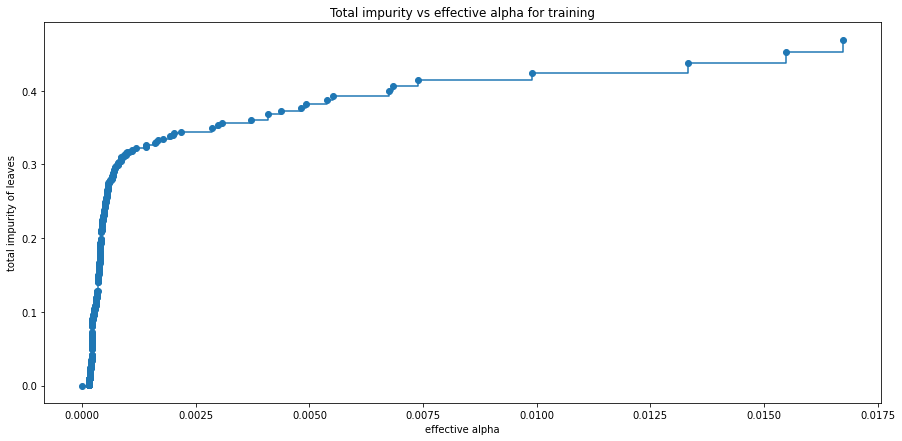

In [49]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots(figsize=(15,7))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post') # removed last one since it is a single node without leaves
ax.set_title('Total impurity vs effective alpha for training')
ax.set_xlabel('effective alpha')
ax.set_ylabel('total impurity of leaves')

***
### Next get accuracy vs alpha for train/test 
### In other words trim leaves from decision tree so as to balance overfit while still keeping good test score
***

In [50]:
# build train classifiers 
clfs=[]
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=10, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# get scores on both train test
train_scores= [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

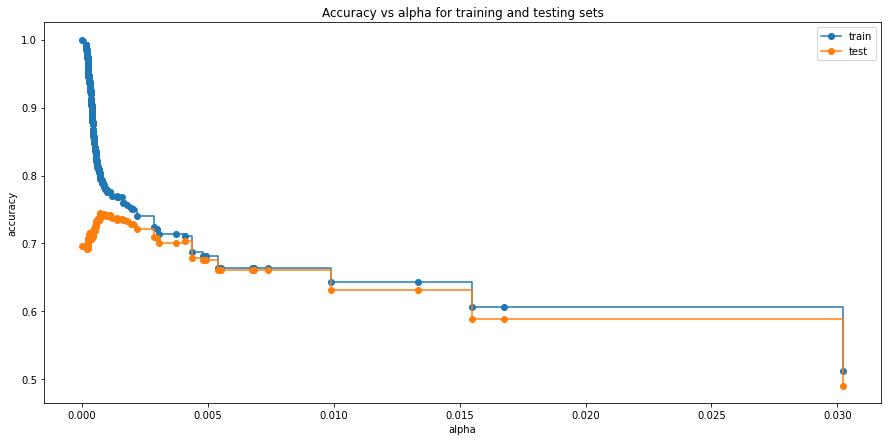

In [97]:
indexstart = 0
indexend = len(clfs)

fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[indexstart:indexend], train_scores[indexstart:indexend], marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[indexstart:indexend], test_scores[indexstart:indexend], marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

***
### Too many alphas and accuracy....get the train and test scores whose diff is min and they both are above 0.70
***

In [100]:
df_scores = pd.DataFrame({'train_score': train_scores, 'test_scores': test_scores, 'ccp_alpha': ccp_alphas})
df_scores['diff'] = df_scores.train_score - df_scores.test_scores
df_scores.sort_values(by='diff', ascending=True, inplace=True)
most_closest_train_test = df_scores[(df_scores.train_score > 0.70) & (df_scores.test_scores > 0.70)].reset_index(drop=True)
most_closest_train_test

,train_score,test_scores,ccp_alpha,diff
0,0.711556,0.704,0.004082,0.007556
1,0.722000,0.708,0.002979,0.014000
2,0.724444,0.710,0.002846,0.014444
3,0.740333,0.722,0.002167,0.018333
4,0.750222,0.729,0.001996,0.021222
...,...,...,...,...
287,0.960778,0.701,0.000214,0.259778
288,0.960778,0.701,0.000215,0.259778
289,0.960778,0.701,0.000214,0.259778
290,0.961222,0.701,0.000214,0.260222


***
### Marked SL = 0.35
### CL = 1 - 0.35 = 0.65
### Choosing ccp_alpha = 0.0102 gives us test > train > CL while still keeping somewhat descent accuracy on test (previosuly 0.77 now 0.71, GENERALIZED MODEL
### Final results->
>### train_accuracy = 0.68
>### test_acuracy = 0.71
>### SL qualify = Yes
>### Generalized Model
***

In [ ]:
# ML model 
clf = DecisionTreeClassifier(random_state=10, ccp_alpha=0.004082)
clf.fit(X_train, y_train)

train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print('train_accuracy: ', train_accuracy)
print('test_accuracy: ', test_accuracy)


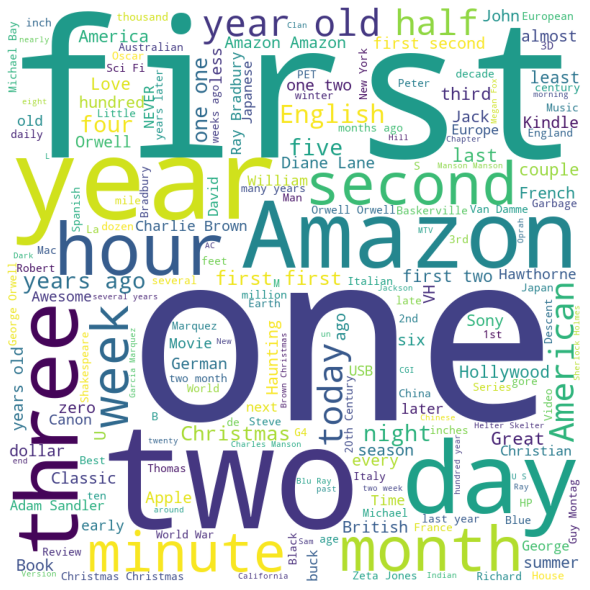

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(final_features)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
stopwords_custom = stopwords.words('english')
stopwords_custom = np.concatenate((stopwords_custom, ['one', 'hour', 'two', 'year', 'day', 'three', 'first', 'today', 'first', 'five', 'second', 'four']))

yelp['NER_Without_StopWords'] = yelp['NER'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stopwords_custom]) )

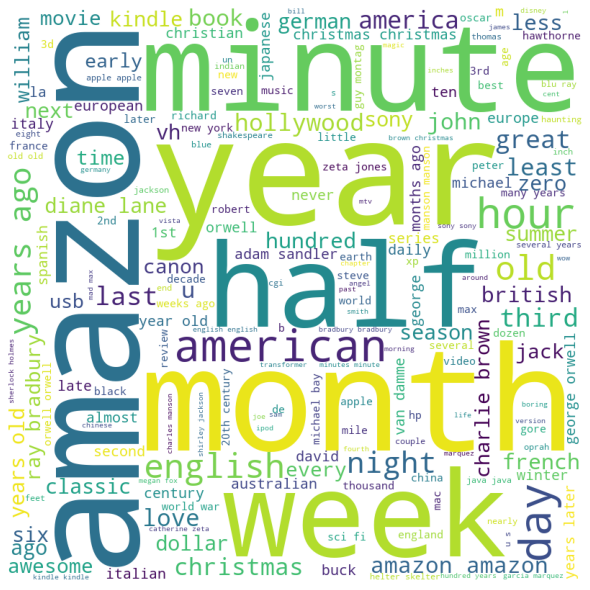

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(' '.join(yelp['NER_Without_StopWords']))

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

***
### Now its more clear picture about what people have talked most about.
### There is a lot of reviews in Phoenix, scottsdale, arizona about mexican, chinese, italian food.
### We see there is mention of time (morning, aternoon, evening, night) and days (sunday, saturday, friday...), even seasons (summer)
***

***
### ML using NLTK
***

In [ ]:
features = yelp['text']
label = yelp['stars']

In [ ]:
def textPreprocessing(document):
  #1. Remove Punctuations
  sentWithoutPunct = ''.join([char for char in document  if char not in string.punctuation])
  #2. Extract words out of the sentences
  words = sentWithoutPunct.split()
  #3. Normalize the data (lowercase)
  wordNormalized = [word.lower() for word in words]
  # 4. Remove Stopwords
  vocabulary = [word for word in wordNormalized if word not in stopwords.words('english')]
  # 5. Apply Stemming
  # a. Exclude those words with NER prop 
  ner_words = [tokens.text for tokens in ner(document).ents]
  # b. perform Stemming with other words
  stemmed = [PorterStemmer().stem(word) for word in vocabulary if word not in ner_words]

  return stemmed



In [ ]:
# Create Train Test Split (90% training -10% testing)
X_train,X_test,y_train,y_test = train_test_split(features,
                                                 label,
                                                 test_size=0.2,
                                                 random_state=10,
                                                 stratify=label)

In [ ]:
# Create BOW in SKlearn

from sklearn.feature_extraction.text import CountVectorizer
wordVector = CountVectorizer(analyzer=textPreprocessing) # textpreprocessing before bow

#Build the Vocabulary
X_tr_bow = wordVector.fit_transform(X_train) #Calc IDF Values
X_ts_bow = wordVector.transform(X_test)

In [ ]:
# Create the tf-idf representation using the bag-of-words matrix
# tf-idf makes rare words more prominent and effectively ignores common words

tfidf = TfidfTransformer(norm=None)
X_tr_tfidf = tfidf.fit_transform(X_tr_bow)
X_ts_tfidf = tfidf.transform(X_ts_bow)

In [ ]:
# l2-normalize the bag-of-words representation
X_tr_l2 = preprocessing.normalize(X_tr_bow, axis=0)
X_ts_l2 = preprocessing.normalize(X_ts_bow, axis=0)

In [ ]:
def simple_logistic_classify(X_tr, y_tr, X_test, y_test, description):
    ### Helper function to train a logistic classifier and score on test data
    m = LogisticRegression(max_iter=500, n_jobs=5).fit(X_tr, y_tr)
    s = m.score(X_test, y_test)
    print ('Test score with', description, 'features:', s)
    return m

In [ ]:
m1 = simple_logistic_classify(X_tr_bow, y_train, X_ts_bow, y_test, 'bow')
m2 = simple_logistic_classify(X_tr_l2, y_train, X_ts_l2, y_test, 'l2-normalized')
m3 = simple_logistic_classify(X_tr_tfidf, y_train, X_ts_tfidf, y_test, 'tf-idf')

Test score with bow features: 0.488
Test score with l2-normalized features: 0.4805
Test score with tf-idf features: 0.4445


In [ ]:
# Specify a search grid, then do a 5-fold grid search for each of the feature sets
param_grid_ = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]}

In [ ]:
# Tune classifier for bag-of-words representation
bow_Search = GridSearchCV(LogisticRegression(max_iter=500), cv=5, param_grid=param_grid_)
bow_Search.fit(X_tr_bow, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [ ]:
# Tune classifier for l2-normalized word vector
l2_search = GridSearchCV(LogisticRegression(max_iter=500), cv=5, param_grid=param_grid_)
l2_search.fit(X_tr_l2, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [ ]:
# Tune classifier for tfidf 
tfidf_search = GridSearchCV(LogisticRegression(max_iter=500), cv=5, param_grid=param_grid_)
tfidf_search.fit(X_tr_tfidf, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [ ]:
search_results = pd.DataFrame.from_dict({'bow': bow_Search.cv_results_['mean_test_score'],
                        'l2': l2_search.cv_results_['mean_test_score'],
                        'tfidf': tfidf_search.cv_results_['mean_test_score']})
search_results

,bow,l2,tfidf
0,0.352625,0.352625,0.438875
1,0.454000,0.352625,0.509125
2,0.515625,0.441750,0.484750
3,0.493000,0.448500,0.470000
4,0.476625,0.470500,0.457375
5,0.466750,0.466250,0.449125


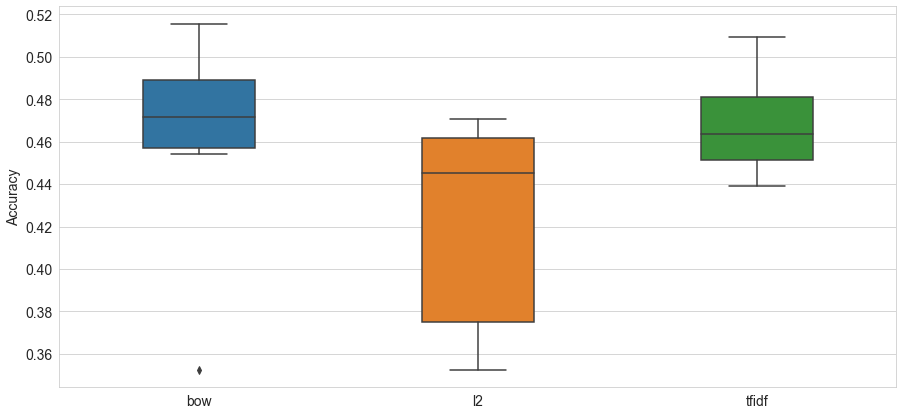

In [ ]:
sns.set_style('whitegrid')
ax = sns.boxplot(data=search_results, width=0.4)
ax.set_ylabel('Accuracy', size=14)
ax.tick_params(labelsize=14)

In [ ]:
# Specify a search grid, then do a 5-fold grid search for each of the feature sets
param_grid_ = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2], 'class_weight':'balanced',
               'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'penalty' :['l1', 'l2', 'elasticnet'],
               'multi_class':['auto', 'ovr', 'multinomial']}
# Tune classifier for tfidf 
tfidf_search = GridSearchCV(LogisticRegression(max_iter=500), cv=5, param_grid=param_grid_)
tfidf_search.fit(X_tr_tfidf, y_train)

In [ ]:
#Check whether the model is generalized or not
print("Training score is ",model.score(X_train,y_train))
print("Testing score is ",model.score(X_test,y_test))

NameError: name 'model' is not defined

In [ ]:
# Check whether the Quality of the model adheres the expected standards
# considering SL = 0.45

print(classification_report(label,model.predict(processedFeatures)))

              precision    recall  f1-score   support

           1       0.91      0.69      0.78       749
           2       0.90      0.50      0.64       927
           3       0.81      0.52      0.63      1461
           4       0.68      0.85      0.76      3526
           5       0.78      0.83      0.80      3337

    accuracy                           0.75     10000
   macro avg       0.81      0.68      0.72     10000
weighted avg       0.77      0.75      0.75     10000

